# Regresión con ANN (predicción de una variable continua)

#### Dataset: Student Performance (Versión CSV)
#### Fuente: UC Irvine Machine Learning Repository
#### Descripción: Desarrollo de un sistema que prediga el desempeño académico de estudiantes y detecte tempranamente riesgo de deserción. Alertas tempranas para implementar intervenciones educativas oportunas.

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2. sex - student's sex (binary: "F" - female or "M" - male)

3. age - student's age (numeric: from 15 to 22)

4. address - student's home address type (binary: "U" - urban or "R" - rural)

5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12. guardian - student's guardian (nominal: "mother", "father" or "other")

13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16. schoolsup - extra educational support (binary: yes or no)

17. famsup - family educational support (binary: yes or no)

18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19. activities - extra-curricular activities (binary: yes or no)

20. nursery - attended nursery school (binary: yes or no)

21. higher - wants to take higher education (binary: yes or no)

22. internet - Internet access at home (binary: yes or no)

23. romantic - with a romantic relationship (binary: yes or no)

24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29. health - current health status (numeric: from 1 - very bad to 5 - very good)

30. absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)

31. G2 - second period grade (numeric: from 0 to 20)

32. G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import sys
import os

# Pon la ruta exacta de la carpeta donde ESTÁ el archivo .py
ruta = r"D:\IA\Ejercicios Keras\Modelo_RendimientoAcademico"

if ruta not in sys.path:
    sys.path.append(ruta)

# Intentar importar
from data_prep import ProcesadoEDA
print("✅ Importado correctamente")

✅ Importado correctamente


In [2]:
import pandas as pd # Manipulación de datos
from data_prep import ProcesadoEDA

In [4]:
student_performance = pd.read_csv('../data/processed/student_performance.csv', sep=',', na_values=[''], quotechar='"')

In [5]:
procesado = ProcesadoEDA(student_performance)

In [6]:
procesado.ch_bool()

D:\IA\Ejercicios Keras\Modelo_RendimientoAcademico\data_prep.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df[columnas_binarias] = self.df[columnas_binarias].replace({'yes': 1, 'no': 0})
D:\IA\Ejercicios Keras\Modelo_RendimientoAcademico\data_prep.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df['famsize'] = self.df['famsize'].replace({'LE3': 1, 'GT3': 0})
D:\IA\Ejercicios Keras\Modelo_RendimientoAcademico\data_prep.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,1,0,18,1,0,0,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,1,0,17,1,0,1,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,1,0,15,1,1,1,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,1,0,15,1,0,1,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,1,0,16,1,0,1,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,19,0,0,1,2,3,services,other,...,4,2,1,2,5,4,10,11,10,0
1040,0,0,18,1,1,1,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,0
1041,0,0,18,1,0,1,1,1,other,other,...,1,1,1,1,5,6,11,12,9,0
1042,0,1,17,1,1,1,3,1,services,services,...,4,5,3,4,2,6,10,10,10,0


#### 3.2 Visualizaciones

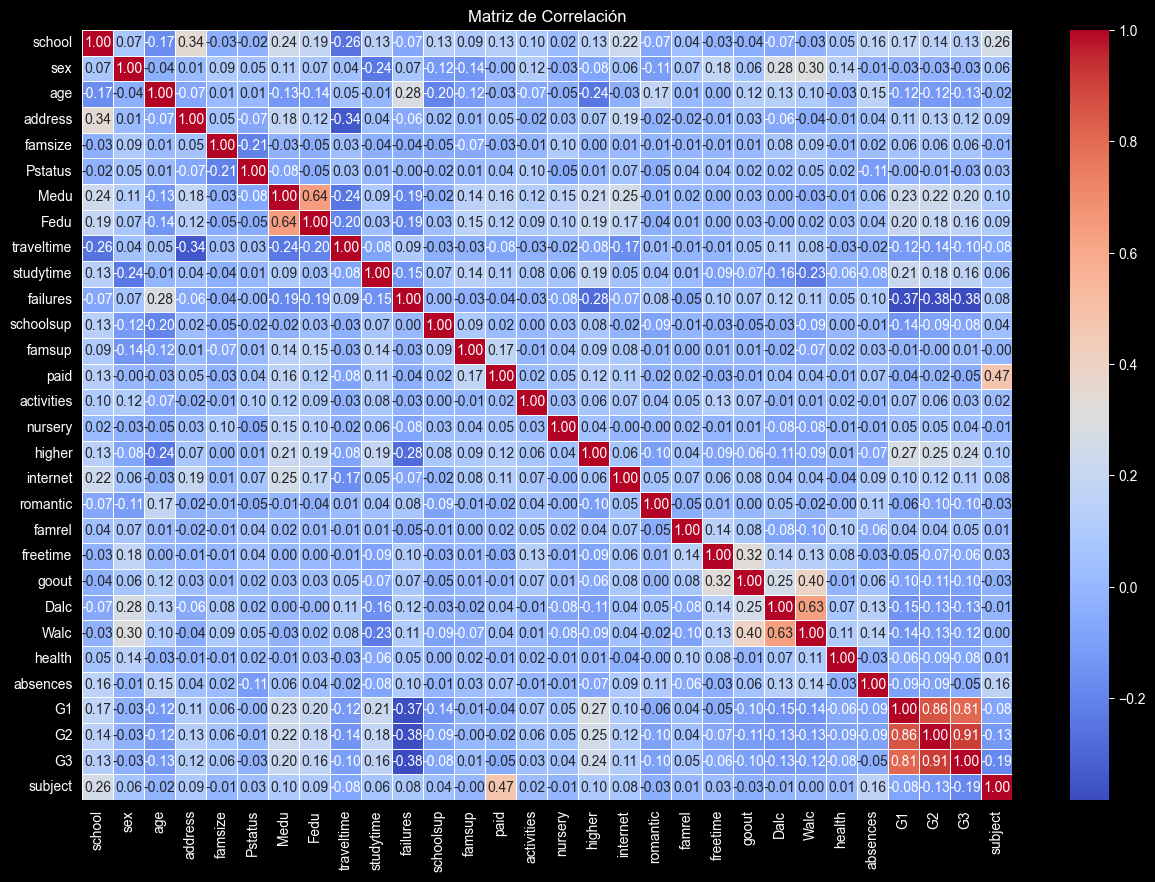

In [7]:
procesado.grafico_correlación()

D:\IA\Ejercicios Keras\Modelo_RendimientoAcademico\data_prep.py:94: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[columna])


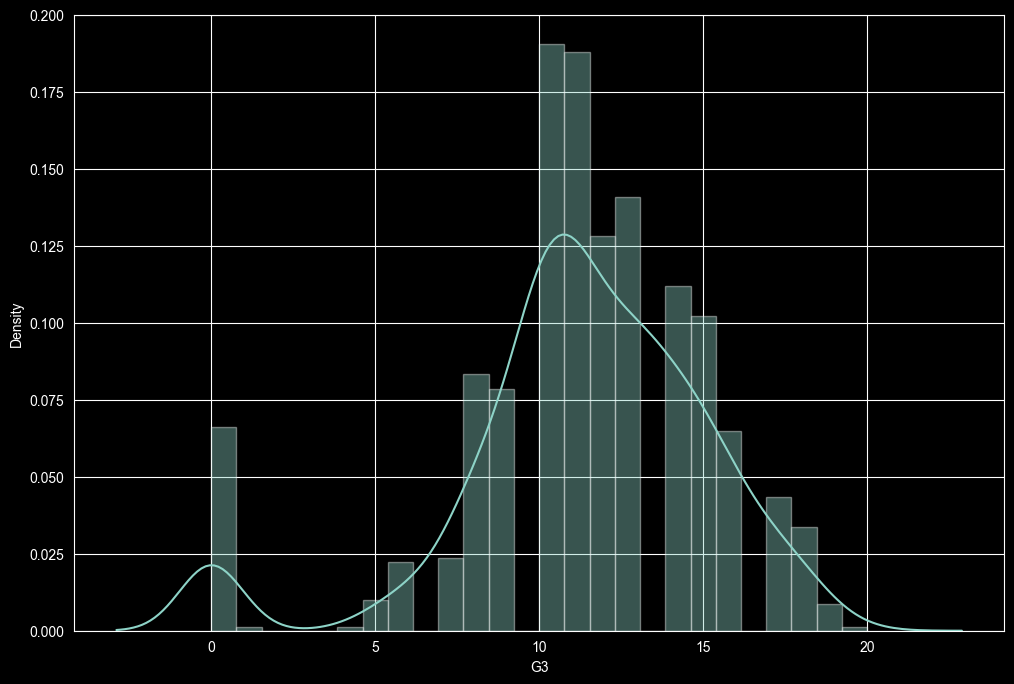

In [8]:
procesado.grafico_distribucion("G3")

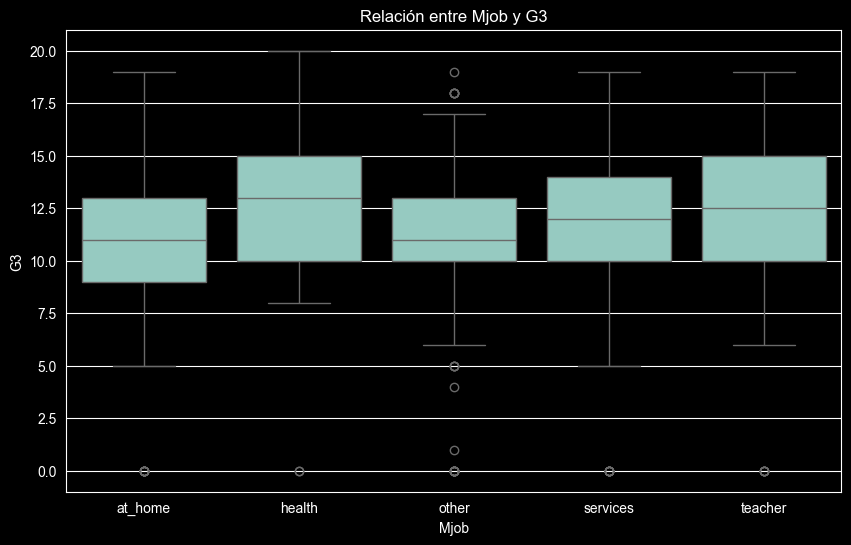

In [9]:
procesado.grafico_boxplot("Mjob","G3")

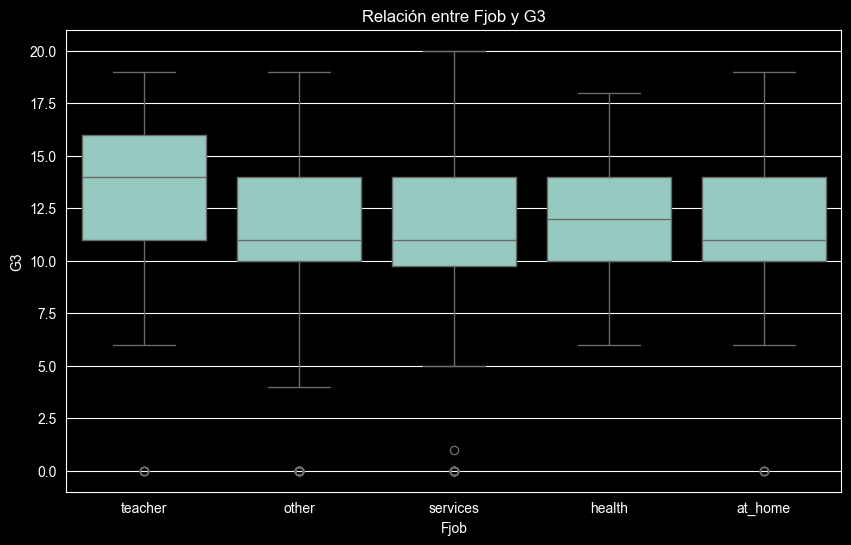

In [10]:
procesado.grafico_boxplot("Fjob", "G3")

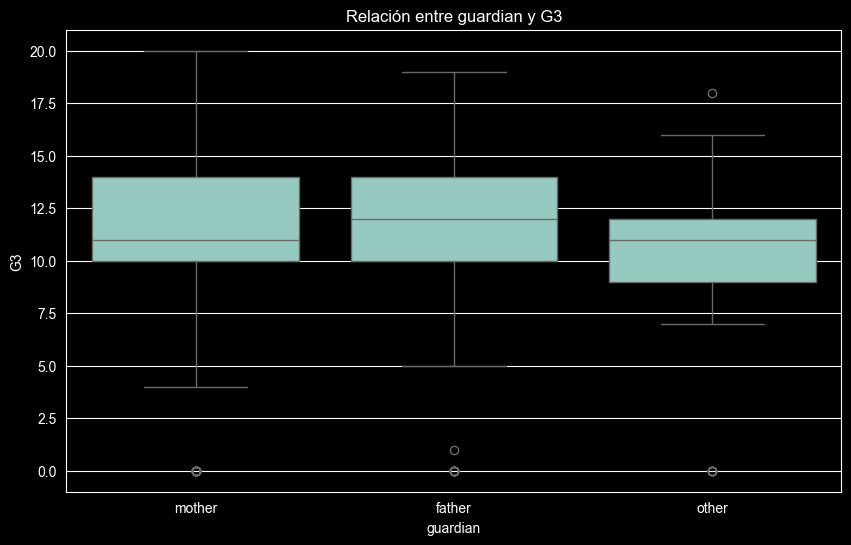

In [11]:
procesado.grafico_boxplot("guardian","G3")